In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from matplotlib.dates import DateFormatter

# Statistics: Labs
## Author Solutions

### 1. Estimating Lengths
Shortly after metric units were introduced to Australia, studentswere asked to guess how long a lecture hall is. We'll plot those estimates. There are guesses in meters and in feet. First, we'll plot all estimates and after that we'll try to see if there's any difference between the two distributions. This will help determine if people are actually more accurate using feet or if they know the metric system well.

Note that in order to see if the two distributions differ significantly, we have to perform a hypothesis test which is out of the scope of this lecture. This can be left as an exercise to the reader :).

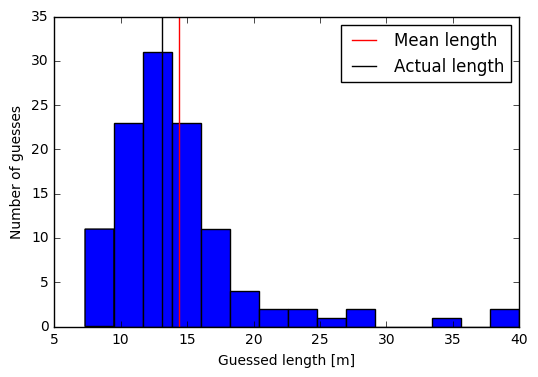

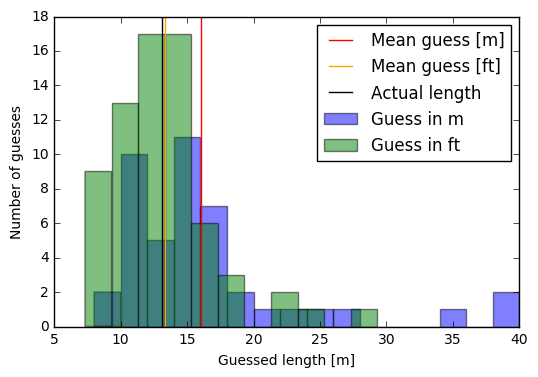

In [2]:
meters = pd.read_table("length_meters.csv", header = None)
feet = pd.read_table("length_feet.csv", header = None) * 0.3048 # Using meters by default
all_guesses = pd.concat([meters, feet])
plt.hist(all_guesses, bins = 15)
plt.xlabel("Guessed length [m]")
plt.ylabel("Number of guesses")
plt.axvline(all_guesses.mean()[0], 0, 35, color = "red", label = "Mean length")
plt.axvline(13.1, 0, 35, color = "black", label = "Actual length")
plt.legend()
plt.show()

bin_width = 2
plt.hist(meters, bins = np.arange(meters.min(), meters.max() + bin_width, bin_width), alpha = 0.5, label = "Guess in m")
plt.hist(feet, bins = np.arange(feet.min(), feet.max() + bin_width, bin_width), alpha = 0.5, label = "Guess in ft")
plt.xlabel("Guessed length [m]")
plt.ylabel("Number of guesses")
plt.axvline(meters.mean()[0], 0, 35, color = "red", label = "Mean guess [m]")
plt.axvline(feet.mean()[0], 0, 35, color = "orange", label = "Mean guess [ft]")
plt.axvline(13.1, 0, 35, color = "black", label = "Actual length")
plt.legend()
plt.show()

It seems like people are more accustomed to the imperial system since:
1. The guesses in feet seem more "condensed" (have a smaller range)
2. The mean guessed length in feet is much closer to the actual value than the meters.

Also, people seem to systematically overestimate the length in meters which may be reasonable because a foot is only about a third of a meter.

### 2. Snowfall Data
We are given data of snowfall in Buffalo, NY in inches for years 1910 – 1972. We have to plot a histogram of the values and overlay the mean, median and the first mode of the distribution.

Mean: 80.29682539682538
Standard deviation: 23.71976831915066
Modes: 82.4, 83.6, 110.5


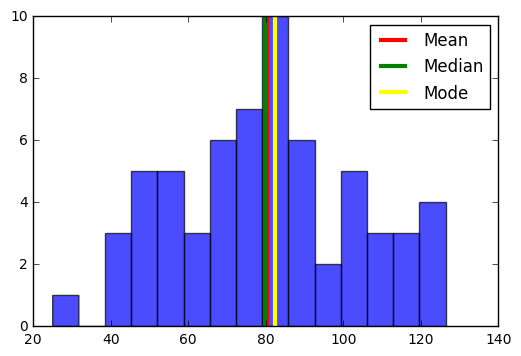

In [3]:
snowfall_data = pd.read_table("snowfall.csv", header = None)
print("Mean: " + str(snowfall_data[0].mean()))
print("Standard deviation: " + str(snowfall_data[0].std()))
print("Modes: " + ", ".join(map(str, snowfall_data[0].mode())))

plt.hist(snowfall_data, bins = 15, alpha = 0.7)
plt.axvline(snowfall_data[0].mean(), 0, 10, color = "red", linewidth = 3, label = "Mean")
plt.axvline(snowfall_data[0].median(), 0, 10, color = "green", linewidth = 3, label = "Median")
plt.axvline(snowfall_data[0].mode()[0], 0, 10, color = "yellow", linewidth = 3, label = "Mode")
plt.legend()
plt.show()

### 3. Boxplots
We have data of cholesterol levels in smokers and ex-smokers. All smokers have been smoking for the past 25 years. All ex-smokers have smoked no more than 5 years and then stopped. We'll use boxplots to compare the cholesterol levels in both groups.

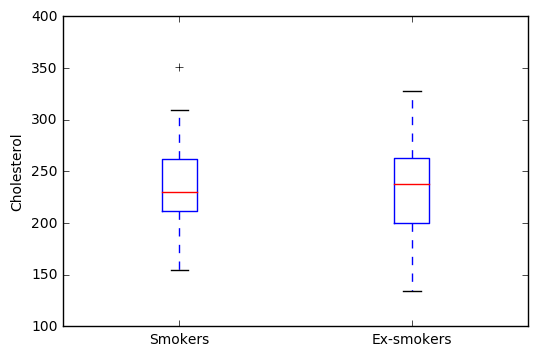

In [4]:
smoking_data = pd.read_table("smoking.csv")
# There are fewer data points for ex-smokers so we have to remove them first
plt.boxplot([smoking_data["Smokers"], smoking_data["Ex-Smokers"][~pd.isnull(smoking_data["Ex-Smokers"])]])
plt.xticks([1, 2], ["Smokers", "Ex-smokers"])
plt.ylabel("Cholesterol")
plt.show()

From the plots we can conclude that there's no significance difference between the two groups. Even if there is actually a difference, we don't have the data to prove it. This can be confirmed via a significance test.

### 4. Lifespan of Rats
We are given data of rats' lifespans (in days) on a restricted diet vs. free eating. We'll explore the data by plotting the two distributions and them putting them together.

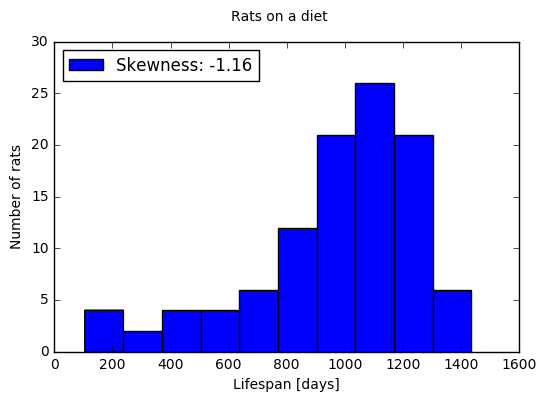

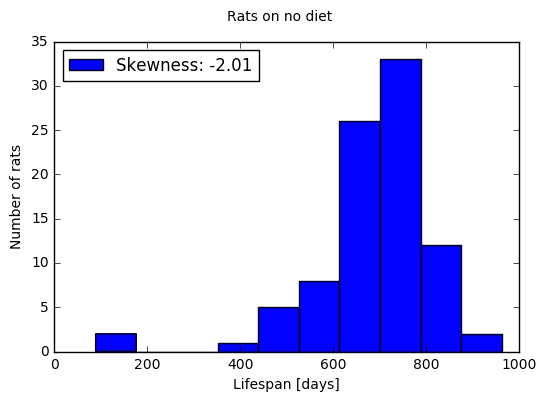

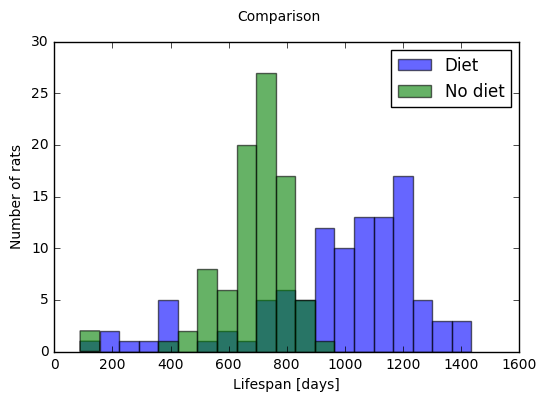

In [5]:
rat_lifespans = pd.read_table("rat_lifespan.csv")

# Once again, we have to deal with NaN values - we remove them so they won't throw errors in the plot
diet = rat_lifespans["Diet"]
no_diet = rat_lifespans["NoDiet"][~pd.isnull(rat_lifespans["NoDiet"])]

plt.suptitle("Rats on a diet")
plt.xlabel("Lifespan [days]")
plt.ylabel("Number of rats")
plt.hist(diet, label = "Skewness: " + str(round(diet.skew(), 2)))
plt.legend(loc = "upper left")
plt.show()

plt.suptitle("Rats on no diet")
plt.xlabel("Lifespan [days]")
plt.ylabel("Number of rats")
plt.hist(no_diet, label = "Skewness: " + str(round(no_diet.skew(), 2)))
plt.legend(loc = "upper left")
plt.show()

# Another way to plot two histograms on the same scale is using numpy
# In this case we provide the number of bins, not the bin width
bins = np.histogram(np.hstack((diet, no_diet)), bins = 20)[1]
plt.suptitle("Comparison")
plt.hist(diet, bins, label = "Diet", alpha = 0.6)
plt.hist(no_diet, bins, label = "No diet", alpha = 0.6)
plt.xlabel("Lifespan [days]")
plt.ylabel("Number of rats")
plt.legend()
plt.show()

From these results we can see that rats on a diet appear to live longer. Not only is the average lifespan longer, the entire distribution seems to be shifted to the right.

### 5. Birth Rates
We are given the number of live births per 10,000 23-year-old women in the US between 1917 and 1975. We'll plot the births as a function of time (year) to see if there are any tendencies.

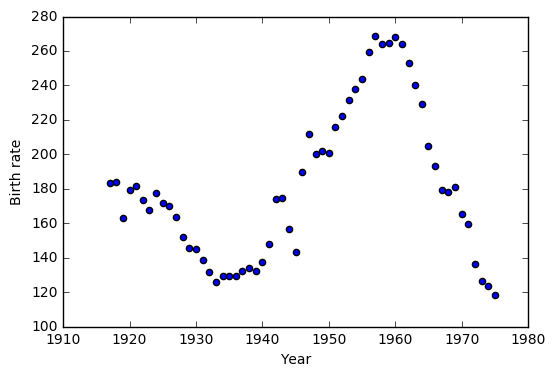

In [6]:
birth_rates = pd.read_table("birth_rates.csv")
plt.scatter(birth_rates["Year"], birth_rates["Birthrate"])
plt.xlabel("Year")
plt.ylabel("Birth rate")
plt.show()

We can see that there is a strong tendency. The birth rates drop significantly from 1920 to 1940-45 then rise sharply, reaching maximum at 1960, then drop again and by 1980 are on par with the previous minimum, or even lower.

We can link those minima and maxima with historical events. For example, the second half of 1930s is related to the World War II and the consequent fall of birthrates. After wars there is usually a significant "baby boom".

### 6. Quebec Car Sales
We are given the number of car sales in Quebec from January 1960 to December 1968. We'll plot several line charts in order to find some seasonal tendencies:
* All sales
* Sales per year (summed over months)
* Sales per month (summed over years)

We can also find periodicity in the data using other algorithms such as Fourier analysis or periodogram analysis but that's outside the scope of this lecture. For now, we'll try to inspect things visually.

Note that the dataset isn't well formatted so we'll have to tidy it up first.

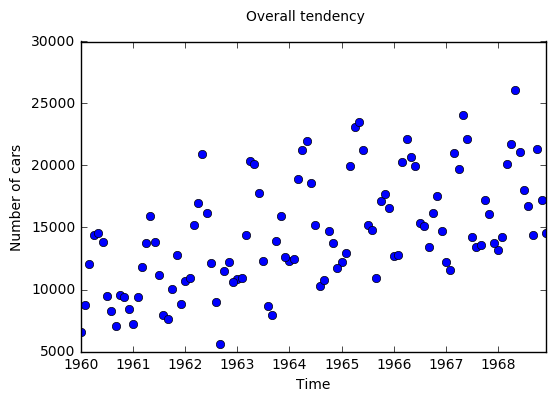

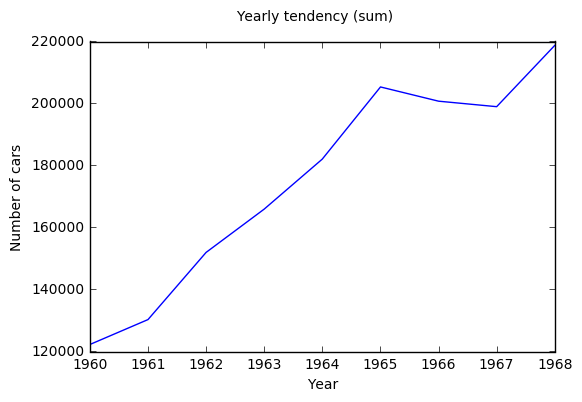

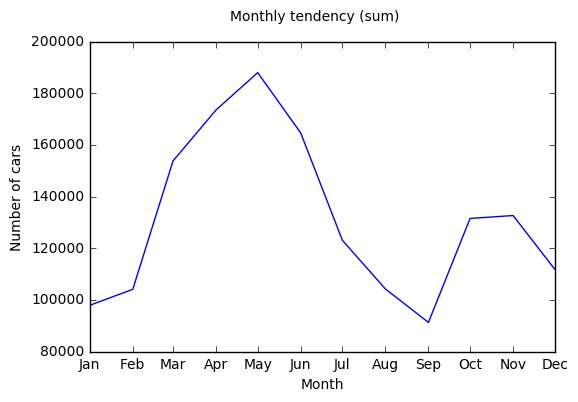

In [7]:
car_sales = pd.read_table("car_sales.csv", header = None)
# Tidy up the dataset: create dates from months and years
car_sales = pd.melt(car_sales, id_vars = [0])
car_sales.columns = ["year", "month", "sales"]
car_sales["date"] = pd.to_datetime({"year": car_sales.year, "month": car_sales.month, "day": 1})
car_sales.drop(["year", "month"], axis = 1, inplace = True)

plt.suptitle("Overall tendency")
plt.plot_date(car_sales.date, car_sales.sales)
plt.xlabel("Time")
plt.ylabel("Number of cars")
plt.show()

sums_by_year = car_sales.groupby([car_sales.date.dt.year]).sum()
sums_by_year.index = pd.to_datetime({"year": sums_by_year.index, "month": 1, "day": 1})
plt.suptitle("Yearly tendency (sum)")
plt.plot_date(sums_by_year.index, sums_by_year.sales, "-")
plt.xlabel("Year")
plt.ylabel("Number of cars")
plt.show()

sums_by_month = car_sales.groupby([car_sales.date.dt.month]).sum()
sums_by_month.index = pd.to_datetime({"year": 1960, "month": sums_by_month.index, "day": 1})
plt.suptitle("Monthly tendency (sum)")
plt.plot_date(sums_by_month.index, sums_by_month.sales, "-")
plt.gca().xaxis.set_major_formatter(DateFormatter("%b"))
plt.xlabel("Month")
plt.ylabel("Number of cars")
plt.show()

We can't see a good structure in the overall tendency at first. That might be because of several reasons, the most obvious ones being the data is noisy and we have a lot of points. When we sum over years, we see a strong tendency to increase. Summing over months reveals a strong seasonal tendency with sales maxing out in late spring and early summer, then declining over the colder months and raising briefly in late autumn.

We can see that the tendency is to sell more cars in spring and autumn (especially in late spring) and fewer carss in late summer and the beginning of winter.

### 7. Brain and Body Weights of Animals
We're given data of the body weight [kg] and brain weight [g] of several animals. We have to see whether there's some correlation between those variables.

First, we'll inspect the histograms of both distributions (on their own) and then we'll try to create a scatterplot.

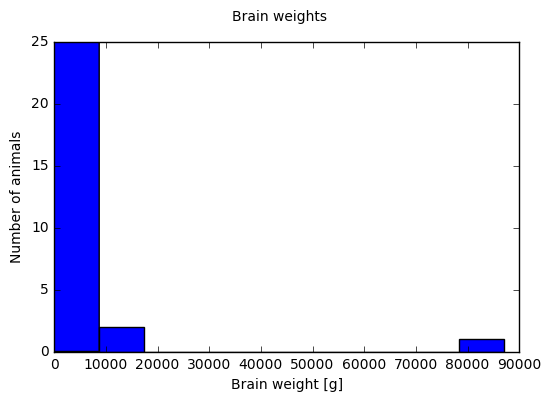

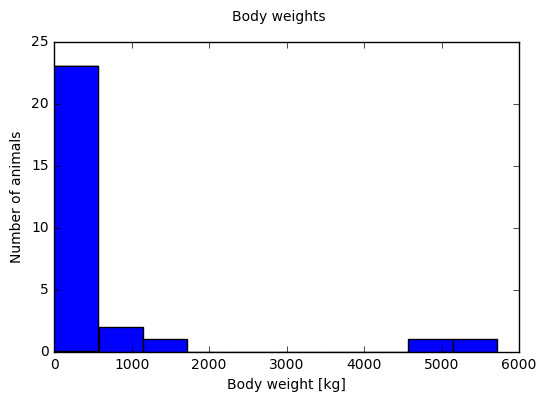

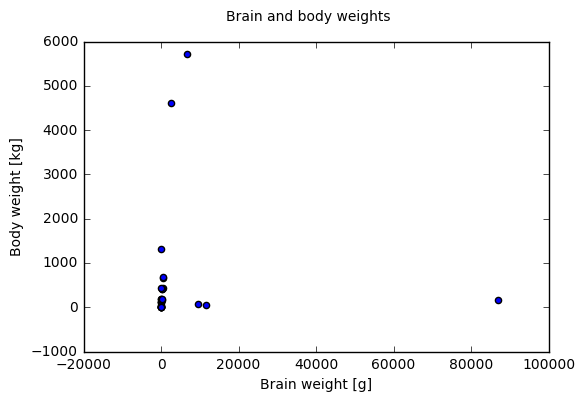

In [8]:
animal_weights = pd.read_table("brain_weight.csv")
plt.suptitle("Brain weights")
plt.hist(animal_weights.brain)
plt.xlabel("Brain weight [g]")
plt.ylabel("Number of animals")
plt.show()
plt.suptitle("Body weights")
plt.hist(animal_weights.body)
plt.xlabel("Body weight [kg]")
plt.ylabel("Number of animals")
plt.show()

plt.suptitle("Brain and body weights")
plt.scatter(animal_weights.brain, animal_weights.body)
plt.xlabel("Brain weight [g]")
plt.ylabel("Body weight [kg]")
plt.show()

The distributions are highly skewed. We can see this from the histograms but it's even more visible when we try to create a scatterplot. A way to deal with highly skewed sitributions is to take logarithms. Since both distributions are skewed, we'll create a log-log plot (which means we'll take logarithms of both variables). 

In order to make working with the data easier, we'll save the new variables in the original dataset.

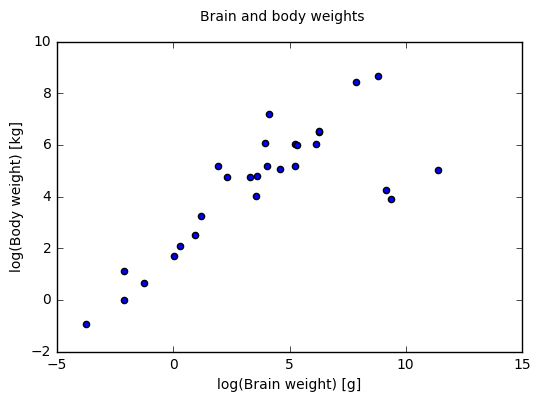

Correlation coefficient: 0.779493496729


In [9]:
animal_weights["log_brain"] = np.log(animal_weights.brain)
animal_weights["log_body"] = np.log(animal_weights.body)

plt.suptitle("Brain and body weights")
plt.scatter(animal_weights.log_brain, animal_weights.log_body)
plt.xlabel("log(Brain weight) [g]")
plt.ylabel("log(Body weight) [kg]")
plt.show()
print("Correlation coefficient: " + str(np.corrcoef(animal_weights.log_brain, animal_weights.log_body)[0][1]))

We see that there's a strong linear correlation between the two variables. In addition, we can inspect the three "outliers". We'd better not remove them since this is a log-log plot and small differences in that correspond to large differences in real variables.

### 8. UCB Admissions
We'll investigate one of the most popular datasets in statistics: the classical case of Simpson's paradox in UCB admissions. We'll explore a subset of the original data but it still shows the paradox. 

The paradox is that overall the university seems biased against admitting more men than women but when we look at the departments, the bias is actually reversed.

The data is insufficient to provide explanation but the original researchers have found a good one: competitiveness between men and women is different: women tend to apply for more challenging departments.

In [10]:
ucb_data = pd.read_csv("UCBAdmissions.csv", index_col = 0)

# We're reusing the filters to save time not doing the same calculation over and over again
all_males = ucb_data[ucb_data.Gender == "Male"]
admitted_males = all_males[all_males.Admit == "Admitted"] 
all_females = ucb_data[ucb_data.Gender == "Female"]
admitted_females = all_females[all_females.Admit == "Admitted"]
print("Percentage of admitted males: " + str(admitted_males.Freq.sum() / all_males.Freq.sum() * 100) + "%")
print("Percentage of admitted females: " + str(admitted_females.Freq.sum() / all_females.Freq.sum() * 100) + "%")
print()

print("By department:")
for department in ucb_data.Dept.unique():
    all_males_in_department = all_males[all_males.Dept == department].Freq.sum()
    admitted_males_in_department = admitted_males[admitted_males.Dept == department].Freq.sum()
    all_females_in_department = all_females[all_females.Dept == department].Freq.sum()
    admitted_females_in_department = admitted_females[admitted_females.Dept == department].Freq.sum()
    print("Dept " + department + ": " + 
          " males: " + str(round(admitted_males_in_department / all_males_in_department * 100, 2)) + "%" + 
          "; females: " + str(round(admitted_females_in_department / all_females_in_department * 100, 2)) + "%")
    

Percentage of admitted males: 44.518766257896694%
Percentage of admitted females: 30.354223433242506%

By department:
Dept A:  males: 62.06%; females: 82.41%
Dept B:  males: 63.04%; females: 68.0%
Dept C:  males: 36.92%; females: 34.06%
Dept D:  males: 33.09%; females: 34.93%
Dept E:  males: 27.75%; females: 23.92%
Dept F:  males: 5.9%; females: 7.04%


As a result, we see that 4 out of 6 departments are biased against women which is the reverse of what the summary shows.